In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

In [2]:
url = 'https://www.worldometers.info/coronavirus/'
now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
_dict = {}
save_csv = False
append_csv = True

In [3]:
page = requests.get(url)
soup = BeautifulSoup(page.content)

In [4]:
for _tr_list in soup.tbody.find_all('tr'):
    _td_list = _tr_list.find_all('td')
    for i, _td in enumerate(_td_list):        
        # Recuperar el nombre del pais cuando es un enlace
        if i%9 == 0:
            _a = _td.find('a')
                # Recuperar el nombre del pais cuando es un enlace
            if _a:
                country_name = _a['href'].split('/')[1]
            else:
                _span = _td.find('span')
                if _span:
                    # Recuperar el nombre del cuando ocupa dos filas
                    country_name = _span.contents[0]
                else:
                     # Recuperar el nombre del pais cuando no es un enlace
                    country_name = _td.contents[0]
            if country_name:
                country_name = country_name.strip()
                if country_name not in list(_dict.keys()):
                    _dict[country_name] = {} 
                _dict[country_name][now] = []
        # Recuperar los datos del pais
        else:
            if len(_td.contents) > 0:
                # Limipiar el dato de cualquier símbolo para poder convertirlo en un valor numérico
                data = _td.contents[0].replace('+','').replace(',','').strip()
                if data:
                    _dict[country_name][now].append(float(data))
                else:
                    _dict[country_name][now].append(0)
            else:
                _dict[country_name][now].append(0)

In [5]:
# https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionary
df = pd.concat({k: pd.DataFrame(v).T for k, v in _dict.items()}, axis=0)
df.columns = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_recovered', 'active_cases', 'servious_critical', 'total_cases_1M_pop']
df.index.names = ['country', 'timestamp']
display(df.head())

,,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,servious_critical,total_cases_1M_pop
country,timestamp,,,,,,,,
Afghanistan,2020-03-22 11:55:07,24.0,0.0,0.0,0.0,1.0,23.0,0.0,0.60
Albania,2020-03-22 11:55:07,76.0,0.0,2.0,0.0,2.0,72.0,2.0,26.00
Andorra,2020-03-22 11:55:07,88.0,0.0,0.0,0.0,1.0,87.0,2.0,1139.00
Angola,2020-03-22 11:55:07,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.06
Antigua and Barbuda,2020-03-22 11:55:07,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.00


In [6]:
if save_csv:
    if append_csv:
        print('Adding data to csv...')
        df.to_csv('covid-19_2020.csv', mode='a', header=False, index=True) 
    else:
        print('Creating csv...')
        df.to_csv('covid-19_2020.csv', index=True)    
else:
    print('Save csv not needed')

Save csv not needed


In [7]:
df = pd.read_csv('covid-19_2020.csv')

In [8]:
df.head()

,country,timestamp,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,servious_critical,total_cases_1M_pop
0,Afghanistan,2020-03-19 19:12:43,22.0,0.0,0.0,0.0,1.0,21.0,0.0,0.6
1,Albania,2020-03-19 19:12:43,64.0,5.0,2.0,0.0,0.0,62.0,2.0,22.0
2,Algeria,2020-03-19 19:12:43,90.0,15.0,9.0,2.0,32.0,49.0,0.0,2.0
3,Andorra,2020-03-19 19:12:43,53.0,0.0,0.0,0.0,1.0,52.0,0.0,686.0
4,Antigua and Barbuda,2020-03-19 19:12:43,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0


In [15]:
# Solo paises más significativos
df_significant = df[(df['total_cases'] > np.percentile(df['total_cases'], 98))].sort_values(by = ['timestamp', 'total_cases'], ascending=False)

# Se muestra el número de casos según el país ("country") para la última muestra
last_timestamp = list(df_significant['timestamp'])[0]
df_last_timestamp = df_significant[(df_significant['timestamp'] == last_timestamp)]
display(df_last_timestamp)

,country,timestamp,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,servious_critical,total_cases_1M_pop
1458,china,2020-03-22 11:51:29,81054.0,46.0,3261.0,6.0,72440.0,5353.0,1845.0,56.0
1468,italy,2020-03-22 11:51:29,53578.0,0.0,4825.0,0.0,6072.0,42681.0,2857.0,886.0
1480,us,2020-03-22 11:51:29,26900.0,2693.0,348.0,46.0,178.0,26374.0,708.0,81.0
1476,spain,2020-03-22 11:51:29,25496.0,0.0,1381.0,0.0,2125.0,21990.0,1612.0,545.0
1462,germany,2020-03-22 11:51:29,22364.0,0.0,84.0,0.0,209.0,22071.0,2.0,267.0
1465,iran,2020-03-22 11:51:29,20610.0,0.0,1556.0,0.0,7635.0,11419.0,0.0,245.0


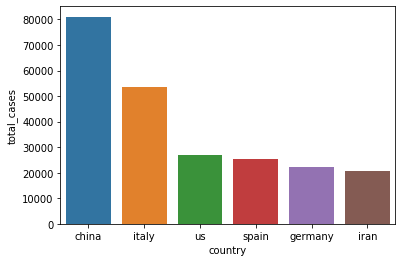

In [16]:
# Se representan gráficamente los resultados
# https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
plot = sns.barplot(x="country", y="total_cases", data=df_last_timestamp)

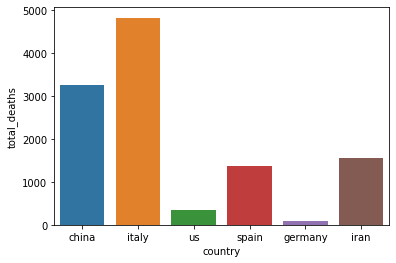

In [17]:
plot = sns.barplot(x="country", y="total_deaths", data=df_last_timestamp)

In [18]:
df_significant = df_significant

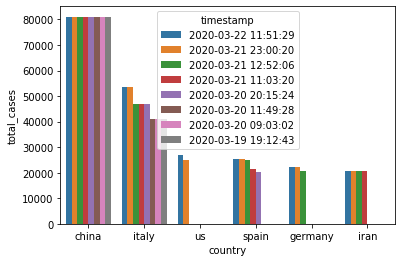

In [19]:
# Se muestra la evolución en el tiempo para cada país ("country")
# Se representan gráficamente los resultados
# 
plot = sns.barplot(x="country", y="total_cases", hue = "timestamp", data=df_significant)

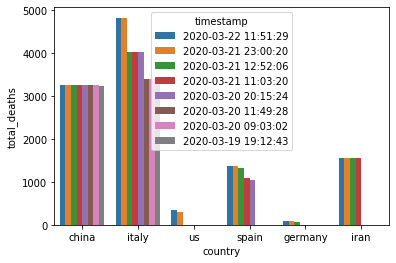

In [20]:
plot = sns.barplot(x="country", y="total_deaths", hue = "timestamp", data=df_significant)

In [21]:
df_spain = df_significant[(df_significant['country'] == 'spain')]

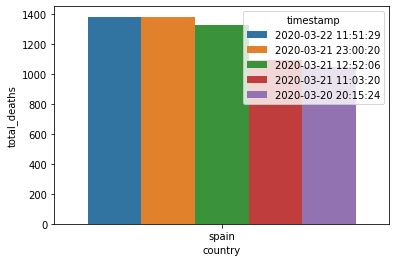

In [22]:
plot = sns.barplot(x="country", y="total_deaths", hue = "timestamp", data=df_spain)